In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
import os
storage = os.environ['MICOM_EXP'] + 'setA_mono_b12_c144/' # on Peregrine
storage

'/data/s4278836/First_project/experiments/setA_mono_b12_c144/'

In [3]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

final_OD_palette = {'ON': '#ffb219', 'OFF': '#a1a9c5'}

In [4]:
species_metadat = pd.read_csv(os.environ['MICOM_EXP'] + 'selected_species_sets.tsv', sep="\t")
species_metadat['Species_ID'] = 'set' + species_metadat['Set'] + '_' + species_metadat['Count'].astype(str)

selected_species = pd.read_csv(storage + 'selected_species_setA.tsv', sep="\t")
selected_species_metadat = selected_species.merge(species_metadat.drop(['Set', 'Count'], axis=1), on=['Species_ID', 'Species_name'])

# Sort species by Phylum & Class
selected_species_metadat = selected_species_metadat.sort_values(by=['Phylum', 'Class'])

ordered_species_list = selected_species_metadat['Species_ID'].to_list()
print(ordered_species_list)

selected_species_metadat

['setA_9', 'setA_18', 'setA_11', 'setA_3', 'setA_4', 'setA_19', 'setA_22', 'setA_6', 'setA_16', 'setA_8', 'setA_14', 'setA_24', 'setA_20', 'setA_17', 'setA_15', 'setA_13', 'setA_21', 'setA_26']


Species_ID                             Species_name          Phylum  \
4      setA_9             Corynebacterium_ulcerans_809  Actinobacteria   
11    setA_18    Microbacterium_oleivorans_NBRC_103075  Actinobacteria   
5     setA_11               Eggerthella_lenta_DSM_2243  Actinobacteria   
0      setA_3           Alistipes_finegoldii_DSM_17242   Bacteroidetes   
1      setA_4            Bacteroides_caccae_ATCC_43185   Bacteroidetes   
12    setA_19             Odoribacter_laneus_YIT_12061   Bacteroidetes   
15    setA_22                 Prevotella_ruminicola_23   Bacteroidetes   
2      setA_6         Brevibacillus_brevis_NBRC_100599      Firmicutes   
9     setA_16              Lactobacillus_gastricus_PS3      Firmicutes   
3      setA_8              Clostridium_difficile_NAP07      Firmicutes   
7     setA_14  Faecalibacterium_cf_prausnitzii_KLE1255      Firmicutes   
16    setA_24         Ruminococcus_lactaris_ATCC_29176      Firmicutes   
13    setA_20           Peptoniphilus_timonensis_JC401      Firmicutes   
10    setA_17   Methyloversatilis_universalis_Fam50001  Proteobacteria   
8     setA_15                Helicobacter_pylori_26695  Proteobacteria   
6     setA_13  Escherichia_coli_str_K_12_substr_MG1655  Proteobacteria   
14    setA_21           Pseudomonas_nitroreducens_HBP1  Proteobacteria   
17    setA_26                    Vibrio_mimicus_MB_451  Proteobacteria   

             Class Gram_staining  Reactions_count  Metabolites_count  \
4   Actinobacteria             +             1154                921   
11  Actinobacteria             +             1354               1075   
5   Coriobacteriia             +              978                813   
0      Bacteroidia             -             1128                875   
1      Bacteroidia             -             1226                953   
12     Bacteroidia             -             1140                950   
15     Bacteroidia             -             1122                918   
2          Bacilli             ?             1593               1163   
9          Bacilli             +             1200                958   
3       Clostridia             +             1273                965   
7       Clostridia             +             1027                837   
16      Clostridia             +              958                843   
13    Tissierellia             ?             1030                841   
10            Beta             -             1320               1087   
8          Epsilon             -             1014                825   
6            Gamma             -             1786               1149   
14           Gamma             -             1623               1225   
17           Gamma             +             1532               1100   

                                      Metabolism_type  
4                         Saccharolytic, fermentative  
11                         Saccharolytic, respiratory  
5                                      Asaccharolytic  
0                         Saccharolytic, fermentative  
1                         Saccharolytic, fermentative  
12                       Asaccharolytic, fermentative  
15                        Saccharolytic, fermentative  
2                                       Saccharolytic  
9          Saccharolytic, fermentative or respiratory  
3            Proteolytic, few carbohydrates fermented  
7   Saccharolytic, fermentative, acetate converted...  
16                        Saccharolytic, fermentative  
13                                                  ?  
10                                       Fermentative  
8                Strictly respiratory, asaccharolytic  
6   Fermentative or respiratory, various carbohydr...  
14                                        Respiratory  
17                        Saccharolytic, fermentative

In [5]:
media_classified = pd.read_csv('./features/classify_media.data.tsv', sep='\t', index_col=0)
media_classified_color = pd.read_csv('./features/classify_media.color.tsv', sep='\t', index_col=0, 
                                   converters={1: ast.literal_eval, 2: ast.literal_eval})

ordered_media_list = media_classified.sort_values(by='Cluster').index.to_list()
print(ordered_media_list)

['mediterranean', 'EU_avg', 'gluten_free', 'high_protein', 'vegan', 'vegetarian', 'diabetes2', 'high_fiber', 'DACH', 'high_fat', 'unhealthy']


In [6]:
batch_data = pd.read_csv(storage + "features/final_point.batch_mono-culture.od.tsv", sep="\t")
batch_data.head()

rep_name species_ID     mode   EU_avg      DACH  diabetes2  gluten_free  \
0     rep1    setA_11  plastic  71.1603   3.90174    42.8540      3.90179   
1     rep1    setA_11      sfm  32.8547   3.90173    32.8556      3.90177   
2     rep1    setA_13  plastic  19.6459  19.62240    50.5720     19.44490   
3     rep1    setA_13      sfm  19.6927  19.69530    19.6966     19.44860   
4     rep1    setA_14  plastic  42.8873  52.30410    48.8055     62.86650   

   high_fat  high_fiber  high_protein  mediterranean  unhealthy     vegan  \
0   1.91985     5.88536       5.88601        5.88619    1.91992   5.88599   
1   1.91986     5.88525       5.88590        5.88601    1.91990   5.88587   
2  19.48500    19.68720      50.39970       19.68520   19.71860  28.18220   
3  19.48500    19.69730      19.69670       19.69720   19.73100  19.69550   
4  52.37430    80.50010      61.72250       71.10070   73.39310  61.72060   

   vegetarian  
0     3.90116  
1     3.90116  
2    47.11660  
3    19.70780  
4    21.77500

In [7]:
media = batch_data.columns[3:].to_list()

batch_data = pd.melt(batch_data, id_vars=['species_ID', 'rep_name', 'mode'], value_vars=media, 
                     var_name='media', value_name='final_OD')

batch_data

species_ID rep_name     mode       media   final_OD
0       setA_11     rep1  plastic      EU_avg   71.16030
1       setA_11     rep1      sfm      EU_avg   32.85470
2       setA_13     rep1  plastic      EU_avg   19.64590
3       setA_13     rep1      sfm      EU_avg   19.69270
4       setA_14     rep1  plastic      EU_avg   42.88730
...         ...      ...      ...         ...        ...
2569     setA_3    rep10  plastic  vegetarian    3.94624
2570     setA_4    rep10  plastic  vegetarian   67.89620
2571     setA_6    rep10  plastic  vegetarian   20.82570
2572     setA_8    rep10  plastic  vegetarian  158.00500
2573     setA_9    rep10  plastic  vegetarian    1.53598

[2574 rows x 5 columns]

In [8]:
batch_plastic = batch_data.loc[batch_data['mode']=='plastic', :]
batch_sfm = batch_data.loc[batch_data['mode']=='sfm', :]

In [9]:
def plot_OD_dist(plastic, sfm, palette, ax):
    if plastic.std() > 0.1:
            sns.violinplot(data=plastic, color=palette['ON'], saturation=1.0, ax=ax)
            ax.collections[0].set_alpha(0.3)

    ax.axhline(y=plastic.mean(), color=palette['ON'], linewidth=4.0)

    sns.swarmplot(data=plastic, color=palette['ON'], edgecolor="white", size=10, ax=ax)

    ax.axhline(y=sfm, color=palette['OFF'], linewidth=4.0)

    ax.set_xticklabels('')
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

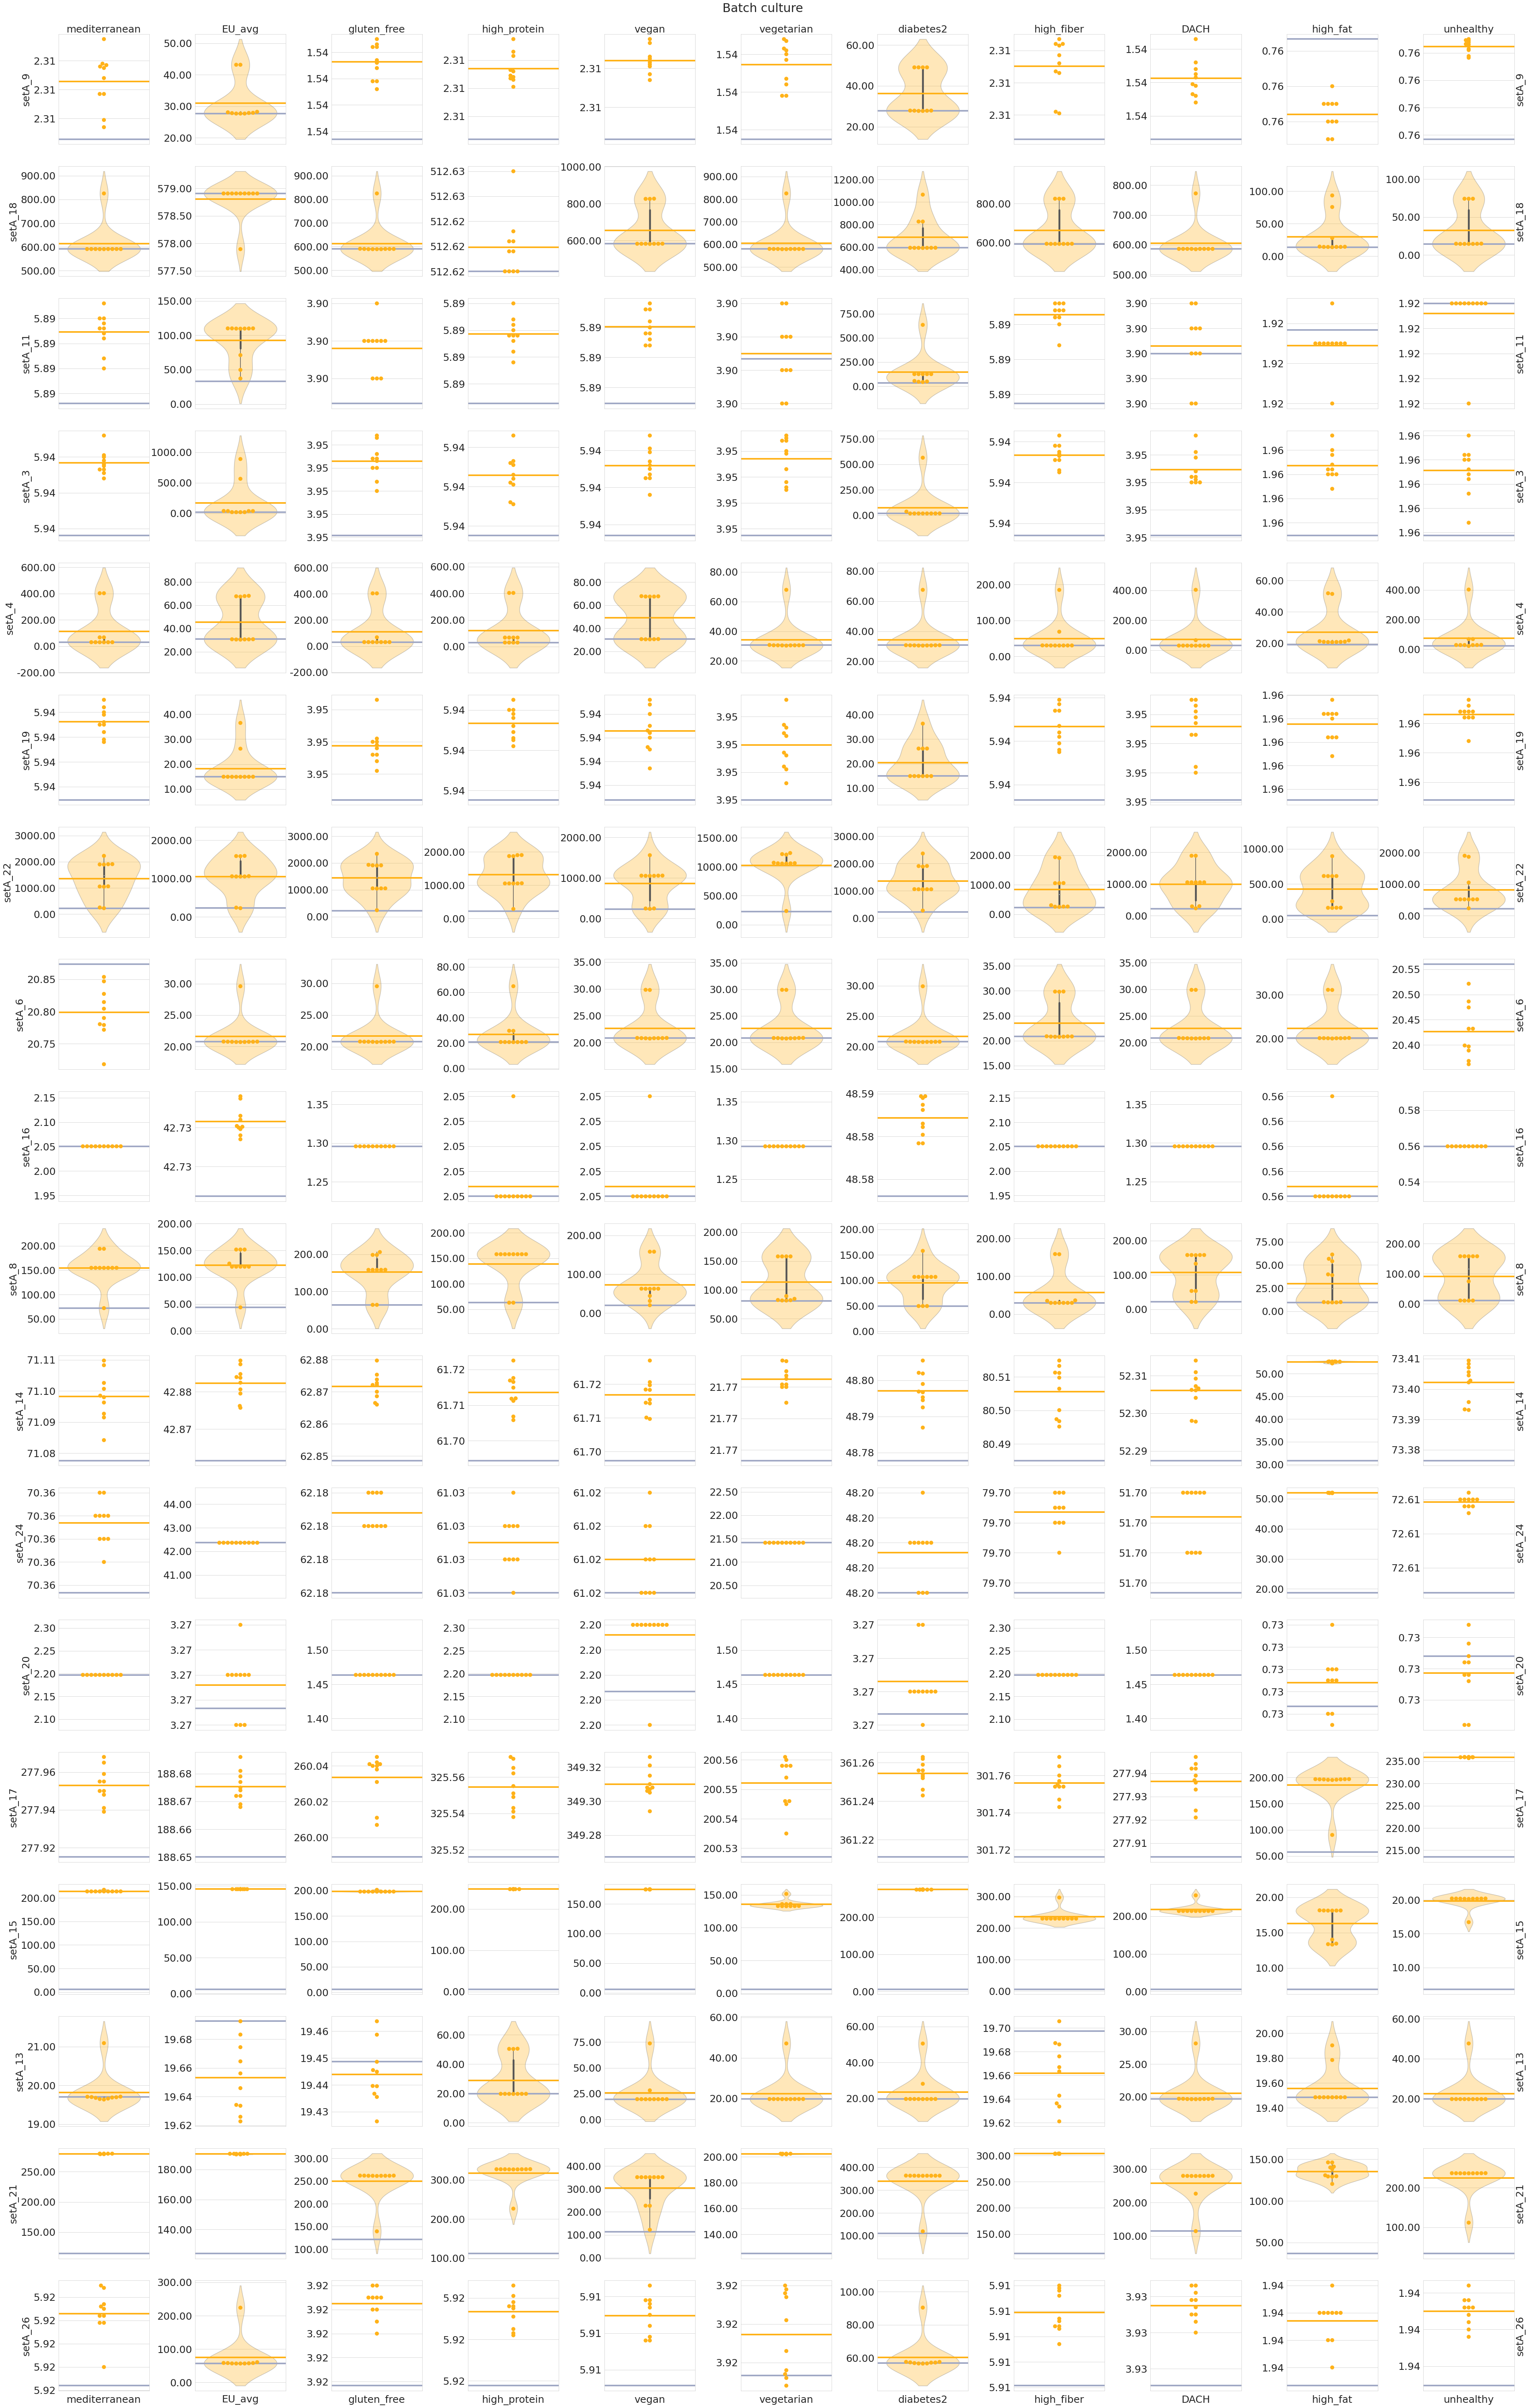

In [10]:
fig = plt.figure(figsize=(10+5*len(ordered_media_list), 6*len(ordered_species_list)))
fig.suptitle('Batch culture', x=0.5, y=0.89)

outer = gridspec.GridSpec(nrows=len(ordered_species_list), ncols=len(ordered_media_list), figure=fig, wspace=0.5, hspace=0.2)

for i in range(len(ordered_species_list)):
    
    sp = ordered_species_list[i]
    
    for j in range(len(ordered_media_list)):
        
        medium = ordered_media_list[j]
        plastic = batch_plastic.loc[(batch_plastic['species_ID'] == sp) & (batch_plastic['media']==medium), 'final_OD'].to_numpy()
        sfm = batch_sfm.loc[(batch_sfm['species_ID'] == sp) & (batch_sfm['media']==medium), 'final_OD'].mean()
        
        plot_ax = fig.add_subplot(outer[i, j])
        
        plot_OD_dist(plastic, sfm, final_OD_palette, plot_ax)
        
        if j==0:
            plot_ax.set_ylabel(sp)
        elif j==len(ordered_media_list)-1:
            plot_ax.yaxis.set_label_position("right")
            plot_ax.set_ylabel(sp)
        
        if i==0:
            plot_ax.xaxis.set_label_position("top")
            plot_ax.set_xlabel(medium)
        elif i==len(ordered_species_list)-1:
            plot_ax.set_xlabel(medium)